In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-alpha0


In [4]:
#import numpy as np
#import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [5]:
dataPath = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataPath


'/home/bmrs/.keras/datasets/auto-mpg.data'

In [6]:
columnNames = ['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acceleration', 'model year', 'origin']
rawData = pd.read_csv('/home/bmrs/.keras/datasets/auto-mpg.data', names= columnNames, na_values="?", comment='\t', sep=" ", skipinitialspace=True)
rawData.head(10)

,mpg,cylinders,displacement,hp,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [7]:
dataset = rawData.copy()
dataset.tail()

,mpg,cylinders,displacement,hp,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [8]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
hp              6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [9]:
dataset = dataset.dropna() # removes 6 records containg NA value of attribute 'hp'

..alternate

**we could repalce NA with mean/median values as well**


In [8]:
dataset2 = rawData.copy()
dataset2.isna().sum()

values = {'hp': '104.469388'} #mean for column hp = 104.469388
dataset2 = dataset2.fillna(value = values)

dataset2.isna().sum()

mpg             0
cylinders       0
displacement    0
hp              0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

..contd 

In [10]:
dataset.tail()

,mpg,cylinders,displacement,hp,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


the 'Origin' attribute is actually categorical not numerical so we change it to different attributes containing bool values. like USA = 1/0 , Japan = 1/0

In [11]:
origin = dataset.pop('origin')

In [12]:
dataset['usa'] = (origin == 1) * 1.0
dataset['europe'] = (origin == 2) * 1.0
dataset['japan'] = (origin == 3) * 1.0

#dataset.head(10)

**Creating training data set and testing data set**

In [29]:
train_data = dataset.sample(frac = 0.8, random_state = 1 )

test_data = dataset.drop(train_data.index)
# print(test_data)
# train_data.iloc[0:5] integer based indexing
# train_data.iat[0, 1] particular value is extracted
len(train_data.keys())

10

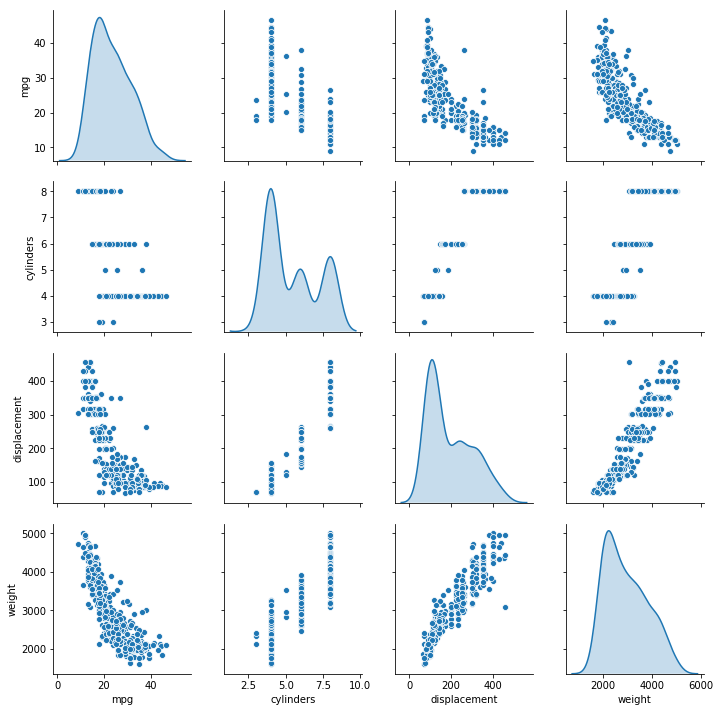

In [14]:
sns.pairplot(train_data[['mpg', 'cylinders', 'displacement', 'weight']], diag_kind = 'kde')

In [15]:
train_stats = train_data.describe()
train_stats
# test_stats = test_data.describe()

,mpg,cylinders,displacement,hp,weight,acceleration,model year,usa,europe,japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.532166,5.490446,195.472930,104.108280,2972.388535,15.509236,76.012739,0.630573,0.178344,0.191083
std,7.951761,1.703662,105.269835,38.153395,844.377092,2.797765,3.678775,0.483420,0.383413,0.393782
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,105.000000,75.250000,2223.750000,13.500000,73.000000,0.000000,0.000000,0.000000
50%,22.200000,4.000000,151.000000,95.000000,2818.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,265.750000,125.000000,3608.000000,17.000000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,4997.000000,24.600000,82.000000,1.000000,1.000000,1.000000


In [16]:
# train_stats.pop('mpg')
train_stats

,mpg,cylinders,displacement,hp,weight,acceleration,model year,usa,europe,japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.532166,5.490446,195.472930,104.108280,2972.388535,15.509236,76.012739,0.630573,0.178344,0.191083
std,7.951761,1.703662,105.269835,38.153395,844.377092,2.797765,3.678775,0.483420,0.383413,0.393782
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,105.000000,75.250000,2223.750000,13.500000,73.000000,0.000000,0.000000,0.000000
50%,22.200000,4.000000,151.000000,95.000000,2818.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,265.750000,125.000000,3608.000000,17.000000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,4997.000000,24.600000,82.000000,1.000000,1.000000,1.000000


In [17]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
mpg,314.0,23.532166,7.951761,9.0,17.50,22.2,29.00,46.6
cylinders,314.0,5.490446,1.703662,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.472930,105.269835,68.0,105.00,151.0,265.75,455.0
hp,314.0,104.108280,38.153395,46.0,75.25,95.0,125.00,225.0
weight,314.0,2972.388535,844.377092,1613.0,2223.75,2818.5,3608.00,4997.0
acceleration,314.0,15.509236,2.797765,8.0,13.50,15.5,17.00,24.6
model year,314.0,76.012739,3.678775,70.0,73.00,76.0,79.00,82.0
usa,314.0,0.630573,0.483420,0.0,0.00,1.0,1.00,1.0
europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
japan,314.0,0.191083,0.393782,0.0,0.00,0.0,0.00,1.0


In [17]:
# train_stats.keys()

**separate labels from features**

In [18]:
# test_labels = test_data.pop('mpg')

**Data Normalization**

In [18]:
def norm(x):
    return ((x-train_stats['mean'])/ train_stats['std'])
normTrainData = norm(train_data)
normTestData = norm(test_data)
normTestData.head()
normTrainData.head(6) 

,mpg,cylinders,displacement,hp,weight,acceleration,model year,usa,europe,japan
82,-0.066924,-0.874848,-0.716947,-0.186308,-0.552346,-0.360729,-1.090781,-1.304400,-0.465148,2.054228
167,0.687626,-0.874848,-0.935434,-0.762928,-0.949088,0.175413,-0.275292,-1.304400,-0.465148,2.054228
356,1.115204,-0.874848,-0.830940,-0.762928,-0.737098,0.461356,1.355685,-1.304400,-0.465148,2.054228
120,-0.569958,-0.874848,-0.707448,0.206842,-0.123628,-0.003301,-0.818952,-1.304400,2.143005,-0.485251
385,1.819450,-0.874848,-0.992430,-0.972608,-1.157526,0.246899,1.627515,-1.304400,-0.465148,2.054228
238,1.253538,-0.874848,-0.925934,-0.553248,-1.062782,0.139670,0.268367,0.764194,-0.465148,-0.485251


In [30]:
len(train_data.keys())


10

In [19]:
def buildModel():
    model = keras.Sequential([
        layers.Dense(64, activation= 'relu', input_shape = [ len(train_data.keys())]),
        layers.Dense(64, activation= 'relu'),
        layers.Dense(1)
    ])
    rmsProp = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer = rmsProp, metrics = ['mae', 'mse']) # we may aslo use default RMSProp as optimizer='rms'
    return model
    

In [21]:
model = buildModel()


In [22]:
modelSum = model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


**Time to choose Batch_size** and predict on the trained model

In [23]:
exampleBatch = normTrainData[:10]
# exampleBatch
exampleResult = model.predict(exampleBatch)
exampleResult

array([[-0.72301996],
       [-0.44283456],
       [-0.297962  ],
       [ 0.02535206],
       [-0.10450649],
       [-0.26374665],
       [ 0.1767262 ],
       [ 0.19479865],
       [-0.5164653 ],
       [-0.29025882]], dtype=float32)

**Training the model** for epoch: 1000 and ***recording the training and validation accuracy***

In [24]:
train_labels = train_data.pop('mpg')

In [25]:
test_labels = test_data.pop('mpg')

In [ ]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0 : print('')
        print('.', end ='')

epochs = 1000

history = model.fit(
    normTrainData, train_labels, epochs = epochs, validation_split = 0.2, verbose = 2, callbacks = [PrintDot()])
            

In [27]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.056151,0.177721,0.056151,0.176105,0.332943,0.176105,995
996,0.053101,0.178489,0.053101,0.116389,0.281456,0.116389,996
997,0.072772,0.228511,0.072772,0.158055,0.318041,0.158055,997
998,0.109899,0.284651,0.109899,0.127408,0.268248,0.127408,998
999,0.048112,0.191766,0.048112,0.129935,0.269626,0.129935,999


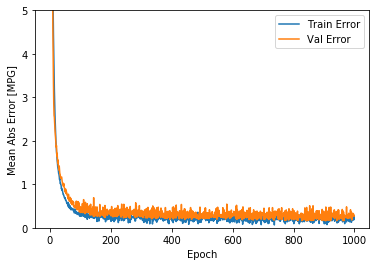

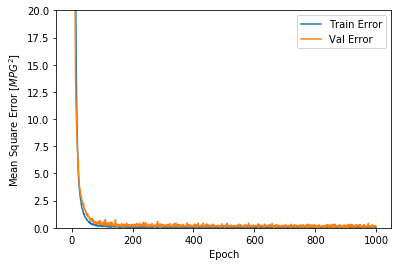

In [28]:
def plotHistory(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
   

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
    
    
plotHistory(history)    


....................................................................................................
........................

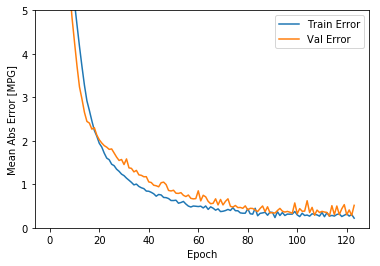

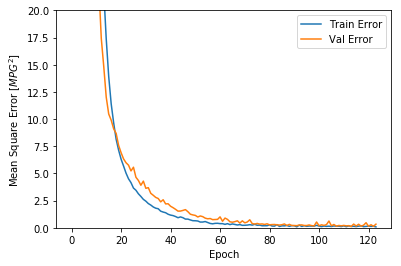

In [31]:
model = buildModel()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(normTrainData, train_labels, epochs = 1000, validation_split= 0.2, verbose = 0, callbacks = [early_stop, PrintDot()])

plotHistory(history)
# len(train_data.keys())


In [32]:
hist = pd.DataFrame(history.history)
hist.tail(5)

,loss,mae,mse,val_loss,val_mae,val_mse
119,0.128297,0.287952,0.128297,0.467606,0.532681,0.467606
120,0.152659,0.319195,0.152659,0.142608,0.299155,0.142608
121,0.129396,0.269385,0.129396,0.281209,0.410848,0.281209
122,0.145299,0.305507,0.145299,0.136403,0.284880,0.136403
123,0.083440,0.221539,0.083440,0.334216,0.516547,0.334216


In [33]:
hist.head(5)

,loss,mae,mse,val_loss,val_mae,val_mse
0,526.748783,21.711681,526.748779,518.407824,21.759308,518.407837
1,449.046775,19.983437,449.046753,442.085401,20.059105,442.085388
2,373.914328,18.143780,373.914307,362.456404,18.113935,362.456421
3,297.302515,16.077049,297.302521,282.304432,15.887615,282.304443
4,225.051230,13.774675,225.051224,210.050473,13.527054,210.050476


In [34]:
normTestData.head(2)


,mpg,cylinders,displacement,hp,weight,acceleration,model year,usa,europe,japan
1,-1.072991,1.473035,1.467914,1.595971,0.853424,-1.433014,-1.634441,0.764194,-0.465148,-0.485251
3,-0.947232,1.473035,1.030942,1.202821,0.545504,-1.254300,-1.634441,0.764194,-0.465148,-0.485251


In [37]:
loss, mae, mse = model.evaluate(normTestData, test_labels, verbose=0)
print("Testing set Mean Abs Error:{:5.2f} MPG".format(mae))

Testing set Mean Abs Error: 0.53 MPG


**PREDICTING MPG value using the data in the training set**

In [38]:
testPred = model.predict(normTestData).flatten()
testPred

array([14.204043, 15.597344, 13.906345, 21.38696 , 24.767593, 10.137557,
        9.823495, 28.050905, 13.545941, 12.952419, 27.306936, 29.50692 ,
       13.501185, 11.729968, 14.752236, 13.247109, 13.586964, 21.512913,
       26.270325, 12.663417, 13.871132, 12.658852, 21.270882, 15.734702,
       23.430977, 15.182279, 31.07452 , 17.500856, 13.867932, 25.478878,
       31.191746, 27.723736, 16.128963, 14.494575, 15.421578, 22.248653,
       24.459166, 28.186855, 32.208977, 27.138477, 15.589139, 29.325182,
       34.65457 , 18.447666, 30.031887, 29.150902, 21.82381 , 21.022148,
       35.862175, 19.88125 , 20.174799, 19.2529  , 29.43069 , 26.661964,
       26.20249 , 30.671837, 19.464783, 22.14795 , 19.82132 , 20.098705,
       15.301583, 26.132093, 37.37267 , 24.43136 , 29.101583, 30.672031,
       31.35014 , 32.99623 , 25.92278 , 25.113735, 32.794514, 31.85879 ,
       23.703968, 27.670828, 26.6402  , 26.49765 , 23.809046, 25.410912],
      dtype=float32)

In [39]:
# # plot = sns.pairplot(test_labels, testPred)
plotData = pd.DataFrame(test_labels)
plotData['predData'] = testPred
plotData.columns = ['actualData', 'predData']


In [40]:
# plotting using seaborn's function
sns.set(color_codes=True)

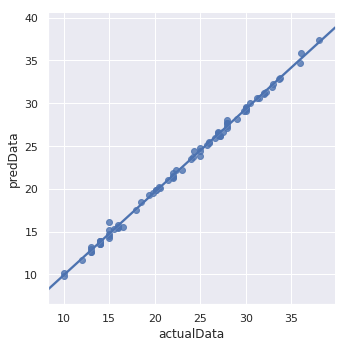

In [41]:
sns.lmplot(x= "actualData", y = "predData", data = plotData)

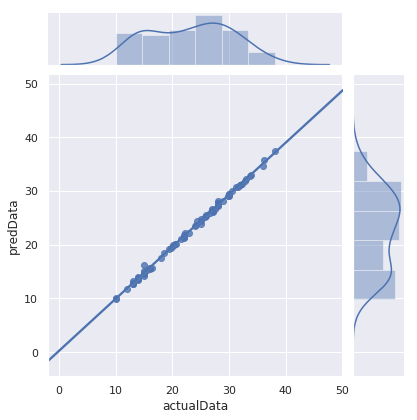

In [42]:
sns.jointplot(x = 'actualData', y = 'predData', data = plotData, kind = 'reg')

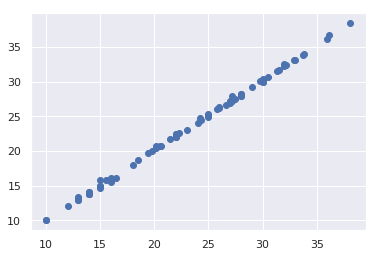

In [123]:
# plt.plot(x, y="actualData",'bo')
# plt.plot(x, y="predData", 'ro')
# plt.xlabel("Actual Value [MPG]")
# plt.ylabel("Predicted Value [MPG]")
# plt.axis("equal")
# plt.show()
plt.scatter('actualData', 'predData', data=plotData)

Text(0, 0.5, 'Count')

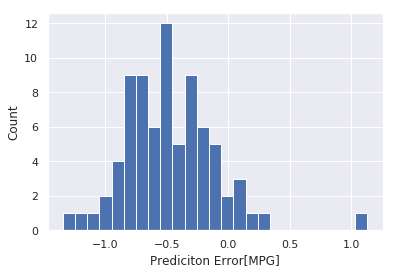

In [44]:
error = testPred - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediciton Error[MPG]")
plt.ylabel("Count")